In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
sns.set_theme(style="whitegrid")
path = os.getcwd() + "/data/processed"
df = pd.read_csv(path + "/tripdata.csv")
df.head()

,ride_id,rideable_type,started_at,started_hour,month,day_of_week,ended_at,ride_length_mins,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_gps,end_gps,time_type
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,23,May,Monday,2022-05-23 23:40:19,33.350000,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,"41.891466, -87.626761","41.94367, -87.64895",Night
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,8,May,Wednesday,2022-05-11 09:31:22,37.900000,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,"41.880958, -87.616743","41.88634906269, -87.6175165471",Morning
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,18,May,Thursday,2022-05-26 18:58:18,21.833333,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,"41.882242, -87.641066","41.907655, -87.672552",Evening
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,7,May,Tuesday,2022-05-10 07:38:49,8.700000,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,"41.882242, -87.641066","41.884576228, -87.63188991",Morning
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,17,May,Tuesday,2022-05-10 17:36:57,5.016667,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,"41.882242, -87.641066","41.88577925240433, -87.65102460980414",Afternoon


In [3]:
DP = sns.color_palette("dark")
df.shape

(5480505, 20)

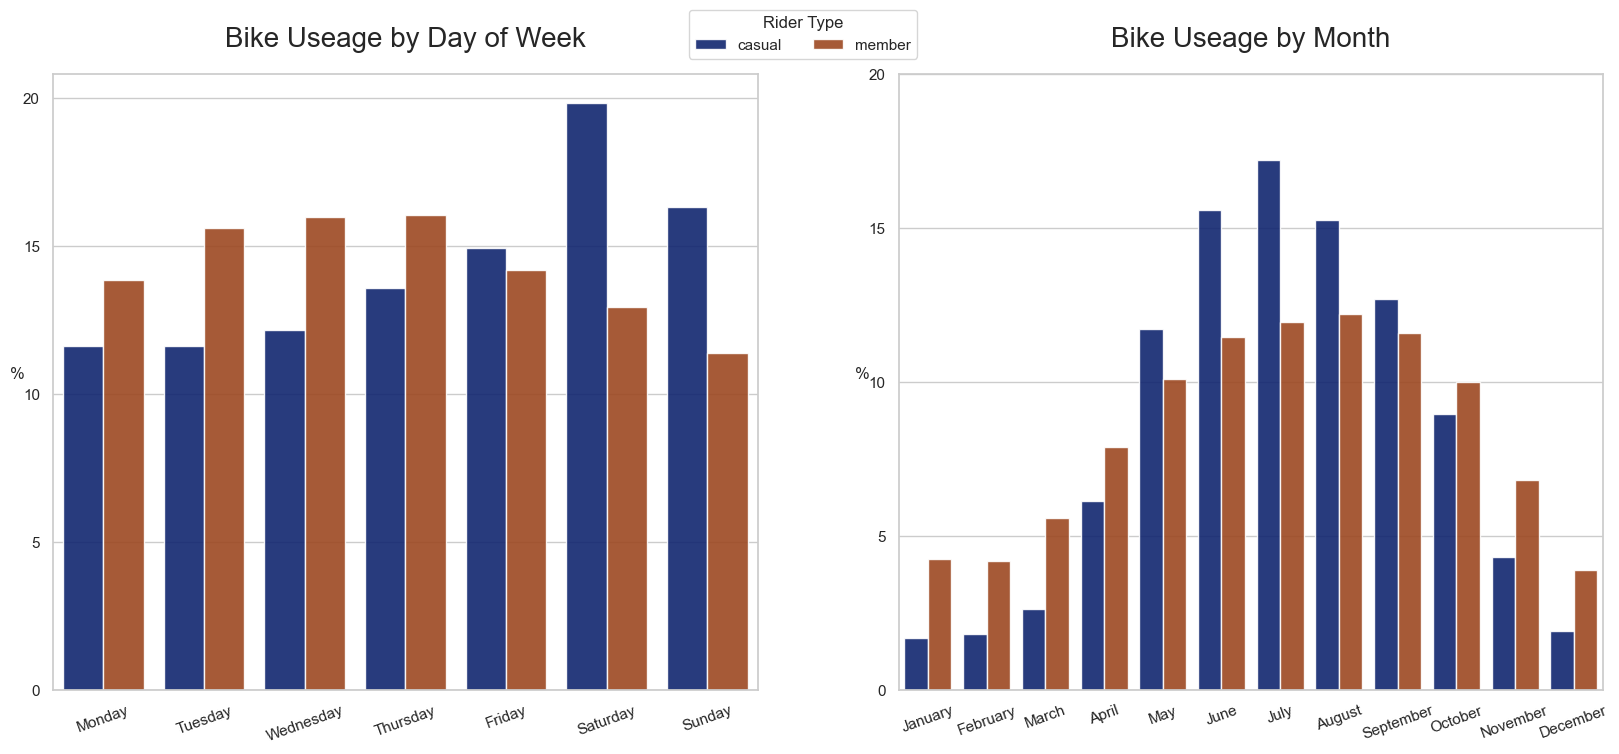

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
# 000's seperator
comma_fct = matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
ax1.get_yaxis().set_major_formatter(comma_fct)
ax1.set_title("Bike Useage by Day of Week", fontsize=20, pad=20)
ax2.get_yaxis().set_major_formatter(comma_fct)
ax2.set_title("Bike Useage by Month", fontsize=20, pad=20)

# plt.tight_layout(pad=10)
# # sort by week
week_dict = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7,
}
dfCas = (
    df.groupby(by="member_casual")["day_of_week"]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
    .sort_values("day_of_week", key=lambda x: x.apply(lambda x: week_dict[x]))
)

g1 = sns.barplot(
    data=dfCas,
    x="day_of_week",
    y="proportion",
    hue="member_casual",
    palette="dark",
    alpha=0.9,
    width=0.8,
    ax=ax1,
)
g1.set_xlabel(xlabel=None)
g1.set_ylabel(ylabel="%", rotation=0)
ax1.set_xticklabels(week_dict.keys(), rotation=20)
g1.set_yticks([0, 5, 10, 15, 20])


# MONTH PLOT
month_dict = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}
dfMem = (
    df.groupby(by="member_casual")["month"]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
    .sort_values("month", key=lambda x: x.apply(lambda x: month_dict[x]))
)
g2 = sns.barplot(
    data=dfMem,
    x="month",
    y="proportion",
    hue="member_casual",
    palette="dark",
    alpha=0.9,
    ax=ax2,
    width=0.8,
)

# add legend
ax1.get_legend().remove()
ax2.get_legend().remove()
handles, labels = ax2.get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="center",
    ncol=3,
    bbox_to_anchor=(0.5, 0.93),
    title="Rider Type",
    mode=None,
)

ax2.set_xticklabels(month_dict.keys(), rotation=20)
g2.set_xlabel(xlabel=None)
g2.set_ylabel(ylabel="%", rotation=0)
g2.set_yticks([0, 5, 10, 15, 20])

For days of the week - the amount of casual member that ride steadily increases from monday and peaks at saturday. On the other hand, the member riders follows a more uniform distribution with slight peaks during the midweek and falling off on the weekend. This suggests that more of member riders use the bikes for commuting, whereas more of the casuals use them for leisure.

For months, both follow a similar distribution whereby there are peaks during the hotter months less riders during the colder months, which make intuitve sense. An interesting difference, is that the peaks for casuals are stronger, suggesting that people are more likely to try out the bikes during these months, or simply use them for leisure.

(0.0, 600.0)

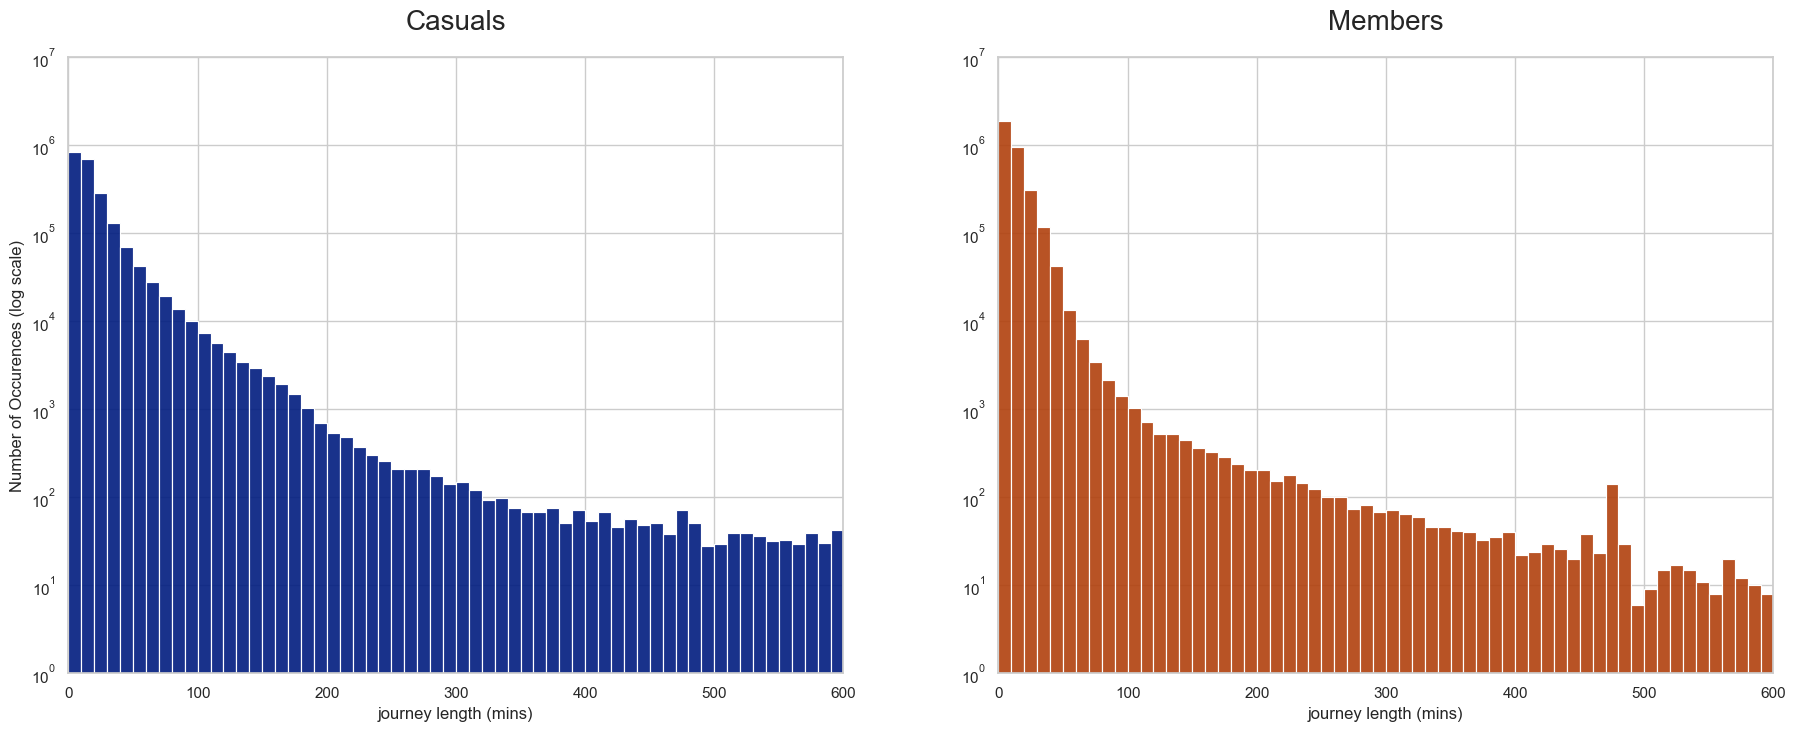

In [5]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(22, 8))


g1 = sns.histplot(
    data=df[df["member_casual"] == "casual"],
    x="ride_length_mins",
    bins=[x for x in range(0, 600 + 1, 10)],
    ax=ax1,
    alpha=0.9,
    color=DP[0],
)
ax1.ticklabel_format(style="plain", axis="both")
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)
g1.set_ylabel(ylabel="Number of Occurences (log scale)")
g1.set_xlabel(xlabel="journey length (mins)")
ax1.set_title("Casuals", fontsize=20, pad=20)
ax1.set_yscale("log")
ax1.set_ylim(1, 1e7)
ax1.set_xlim(0, 600)

g2 = sns.histplot(
    data=df[df["member_casual"] == "member"],
    x="ride_length_mins",
    bins=[x for x in range(0, 600 + 1, 10)],
    ax=ax2,
    alpha=0.9,
    color=DP[1],
)
ax2.ticklabel_format(style="plain", axis="both")
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)
g2.set_ylabel(ylabel=None)
g2.set_xlabel(xlabel="journey length (mins)")
ax2.set_title("Members", fontsize=20, pad=20)
ax2.set_yscale("log")
ax2.set_ylim(1, 1e7)
ax2.set_xlim(0, 600)

To read the above graph, as we are looking at a log scale, every y-value is amplified. Each y value on the axis is 10 times larger than the previous.

This means that when we see that the distribution for members for journeys less than 100 minutes is larger, it is logarithmically larger. This reaffirms the hypothesis that members are more likely to be using the bikes for commutes, where short journeys are more likely.
 
Overall, we see that casual members are more likely to engage in longer journeys, apart from the spike in around the 470 minute range for members, which would require further analysis to diagnose.

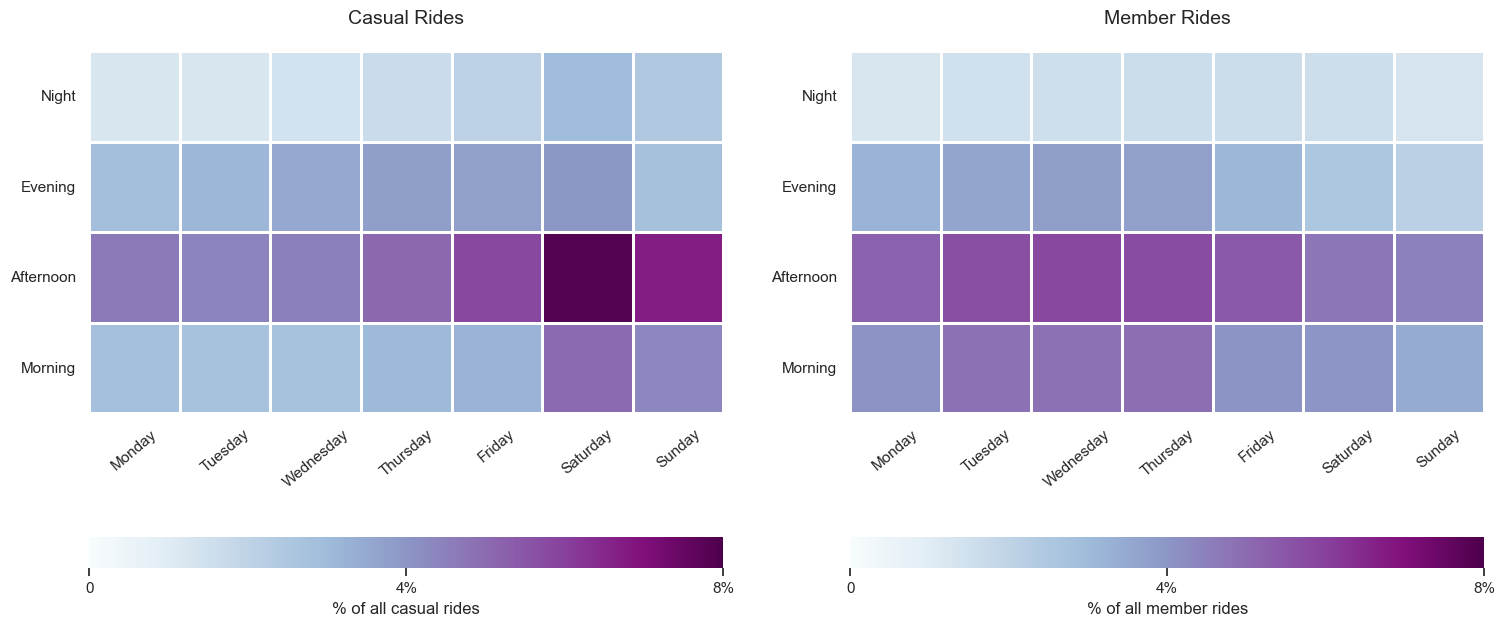

In [6]:
_orderedDayTime = ["Morning", "Afternoon", "Evening", "Night"][::-1]
_orderedWeekDay = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# 2.2m cas 3.3m memb
# casual plot
dfCasual = pd.pivot_table(
    df[df["member_casual"] == "casual"],
    values="ride_id",
    index="time_type",
    columns="day_of_week",
    aggfunc="count",
)
_total = dfCasual.sum().sum()
dfCasual = dfCasual.apply(lambda x: (x / _total) * 100)

dfCasual = dfCasual[_orderedWeekDay]
dfCasual = dfCasual.reindex(_orderedDayTime)
g1 = sns.heatmap(
    dfCasual,
    cmap="BuPu",
    square=True,
    linewidths=1,
    vmin=0,
    vmax=8,
    cbar_kws={
        "format": comma_fct,
        "label": "% of all casual rides",
        "orientation": "horizontal",
        "pad": 0.2,
    },
    ax=axs[0],
)
axs[0].set_xticklabels(_orderedWeekDay, rotation=40)
axs[0].set_yticklabels(_orderedDayTime, rotation=0)
g1.set_ylabel(ylabel=None)
g1.set_xlabel(xlabel=None)
axs[0].set_title("Casual Rides", fontsize=14, pad=20)

cbar = g1.collections[0].colorbar
cbar.set_ticks([0, 4, 8])
cbar.set_ticklabels(["0", "4%", "8%"])


# # member plot
dfMember = pd.pivot_table(
    df[df["member_casual"] == "member"],
    values="ride_id",
    index="time_type",
    columns="day_of_week",
    aggfunc="count",
)
_total = dfMember.sum().sum()
dfMember = dfMember.apply(lambda x: (x / _total) * 100)

dfMember = dfMember[_orderedWeekDay]
dfMember = dfMember.reindex(_orderedDayTime)
g2 = sns.heatmap(
    dfMember,
    cmap="BuPu",
    square=True,
    linewidths=1,
    vmin=0,
    vmax=8,
    cbar_kws={
        "format": comma_fct,
        "label": "% of all member rides",
        "orientation": "horizontal",
        "pad": 0.2,
    },
    ax=axs[1],
)
axs[1].set_xticklabels(_orderedWeekDay, rotation=40)
axs[1].set_yticklabels(_orderedDayTime, rotation=0)
g2.set_ylabel(ylabel=None)
g2.set_xlabel(xlabel=None)
axs[1].set_title("Member Rides", fontsize=14, pad=20)

cbar = g2.collections[0].colorbar
cbar.set_ticks([0, 4, 8])
cbar.set_ticklabels(["0", "4%", "8%"])

For casual riders, the time of day with most rides across all days are afternoons. There is also a larger proportion of casual riders in the weekend afternoons. This suggests that there is a significant amount of casual riders that use the bikes for leisure on the weekends, rather than for commuting.

On the other hand, although member riders also ride more often in the afternoons, it is much more spread uniformly spread out across the weekdays. A higher proportion of member riders also use the bikes in the morning weekdayas than casual riders. This suggests that member riders use the bikes to commute to work.

These findings suggest that a higher proportion of member riders use the bikes to commute to work than casual riders. Although the casual riders are more likely to be using the bikes for leisure, there is still a sizeable amount of casuals using the bikes in afternoon weekdays, suggesting a sizeable proportion do use them to commute.

In [7]:
del dfCasual, dfMember

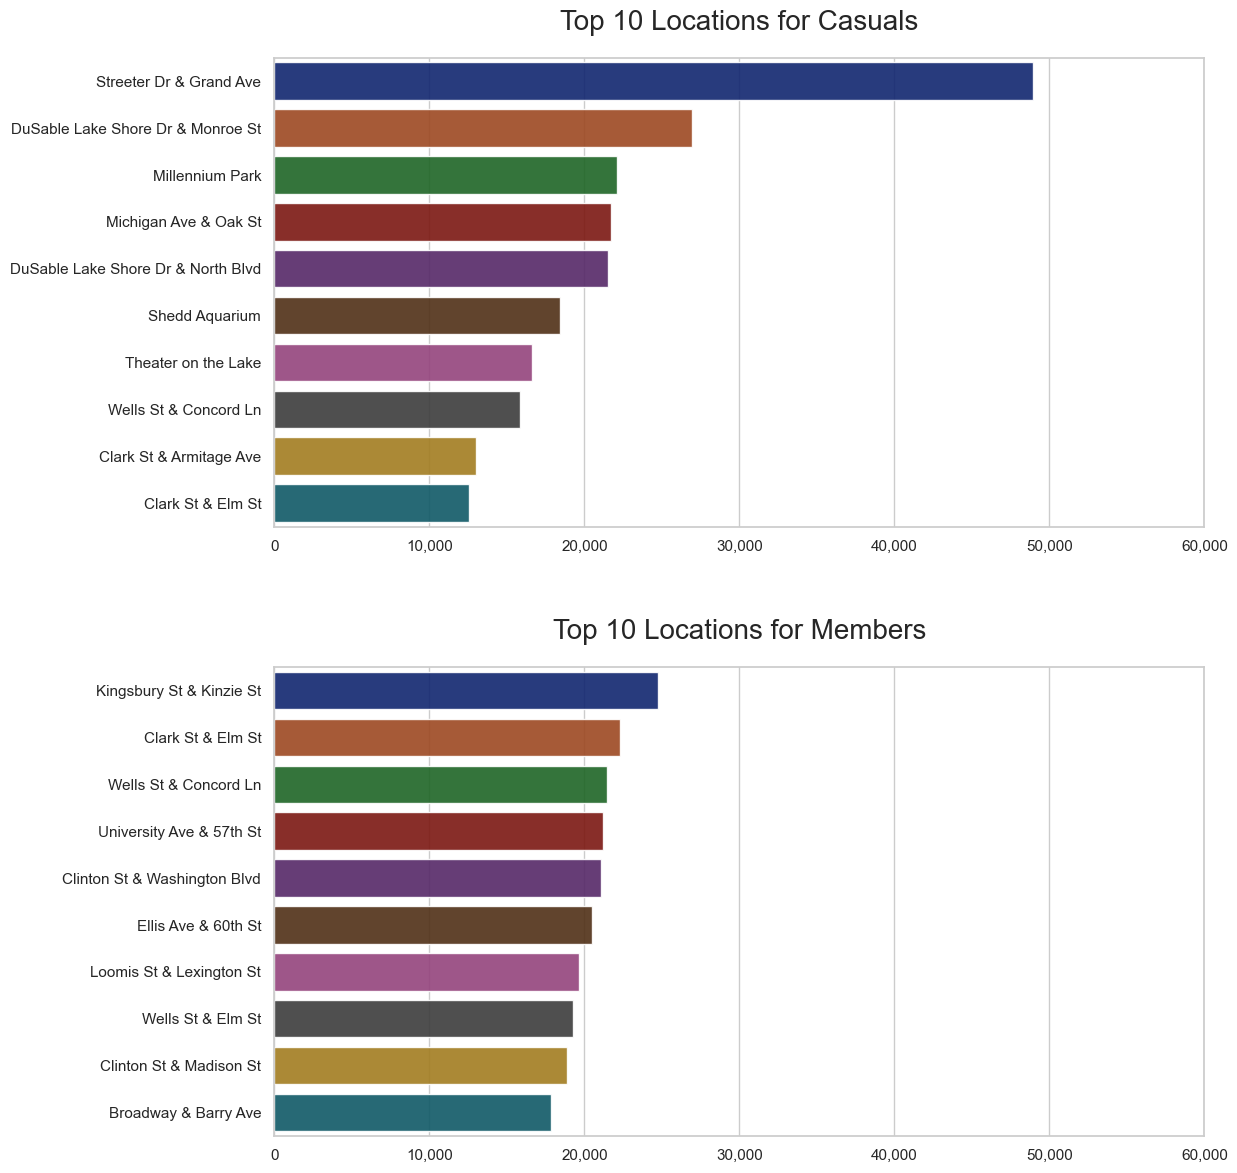

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))

ax1.set(alpha=0.9)
ax2.set(alpha=0.9)

# CASUALS PLOT
dfCasual = df[df["member_casual"] == "casual"]

topStreets = dfCasual["start_station_name"].value_counts().nlargest(10).index
dfTopCasual = dfCasual[dfCasual["start_station_name"].isin(topStreets)]
dfTopCasual = dfTopCasual.sort_values(by="start_station_name", ascending=False)
g1 = sns.countplot(
    data=dfTopCasual,
    y="start_station_name",
    palette="dark",
    alpha=0.9,
    order=topStreets,
    ax=ax1,
)
g1.set_xlabel(xlabel=None)
g1.set_ylabel(ylabel=None)
ax1.get_xaxis().set_major_formatter(comma_fct)
ax1.set_title("Top 10 Locations for Casuals", fontsize=20, pad=20)
ax1.set_xlim(0, 6e4)

# MEMBERS PLOT
dfMember = df[df["member_casual"] == "member"]

topStreets = dfMember["start_station_name"].value_counts().nlargest(10).index
dfTopMember = dfMember[dfMember["start_station_name"].isin(topStreets)]
dfTopMember = dfTopMember.sort_values(by="start_station_name", ascending=False)
g1 = sns.countplot(
    data=dfTopMember,
    y="start_station_name",
    palette="dark",
    alpha=0.9,
    order=topStreets,
    ax=ax2,
)
g1.set_xlabel(xlabel=None)
g1.set_ylabel(ylabel=None)
ax2.get_xaxis().set_major_formatter(comma_fct)
ax2.set_title("Top 10 Locations for Members", fontsize=20, pad=20)
ax2.set_xlim(0, 6e4)
plt.subplots_adjust(hspace=0.3)

del dfCasual, dfMember

A large proportion of the top 10 locations for casuals are what would be assocaited with tourist attractions or days out. Locations like shedd aquarium are "nice to visits" for tourists, where as the other locations are suitable for days out as they are either by the seafront or in open plan parks. This suggests that these bikes are being used for leisure and one offs.

On the other hand, the top locations for members are within residential areas and closer towards central chicago. This reaffirms our previous interpretation that a higher proportion of member riders use the bikes for commuting to and from work.

However, it's important to understand the limitation of this visual presentation - each bar represents less than 1% of each sample for casuals and members. There is a much wider variety of locations than is presented here.


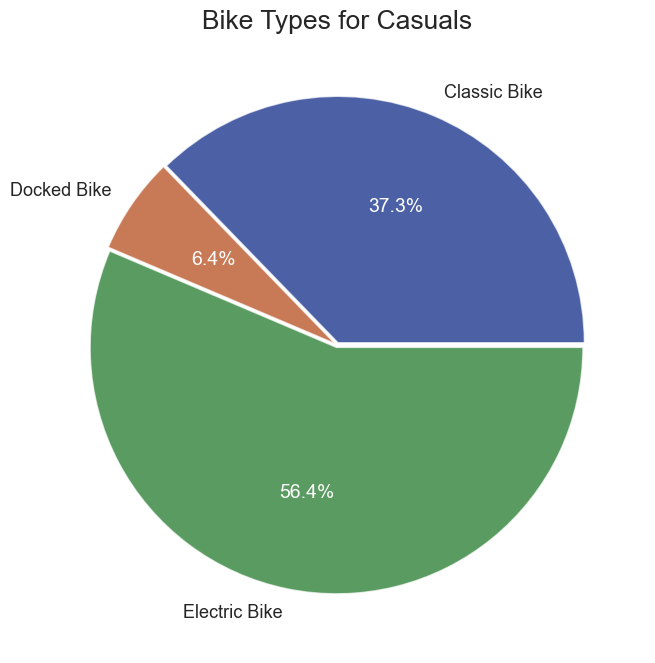

In [9]:
dfCasual = df[df["member_casual"] == "casual"]
casualPct = (
    dfCasual["rideable_type"]
    .value_counts(normalize=True)
    .mul(100)
    .sort_index()
    .to_list()
)
plt.figure(figsize=(40, 8))
plt.title(label="Bike Types for Casuals", fontdict={"fontsize": 19})
_, _, autotexts = plt.pie(
    casualPct,
    labels=["Classic Bike", "Docked Bike", "Electric Bike"],
    colors=DP,
    wedgeprops={"alpha": 0.7},
    textprops={"fontsize": 13},
    autopct="%.1f%%",
    explode=[0.01, 0.01, 0.01],
)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(14)

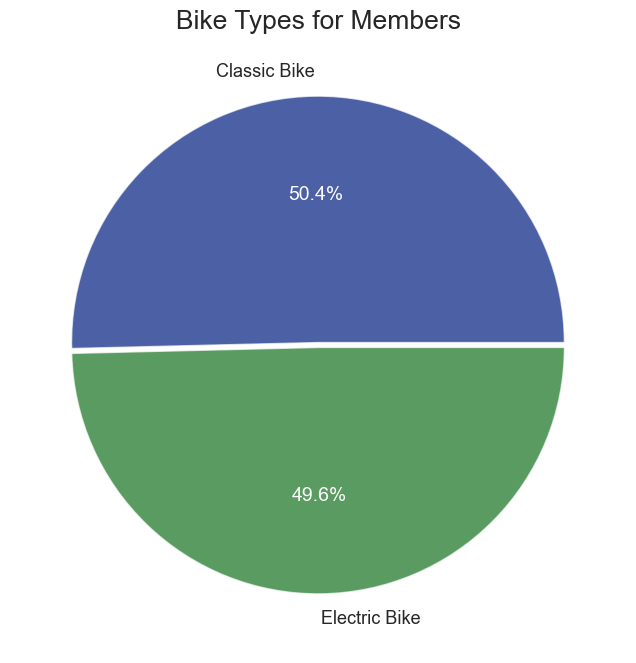

In [10]:
dfMember = df[df["member_casual"] == "member"]
memberPct = (
    dfMember["rideable_type"]
    .value_counts(normalize=True)
    .mul(100)
    .sort_index()
    .to_list()
)
plt.figure(figsize=(40, 8))
plt.title(label="Bike Types for Members", fontdict={"fontsize": 19})
_, _, autotexts = plt.pie(
    memberPct,
    labels=["Classic Bike", "Electric Bike"],
    colors=[DP[0], DP[2]],
    textprops={"fontsize": 13},
    explode=[0.01, 0.01],
    autopct="%.1f%%",
    wedgeprops={"alpha": 0.7},
)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(14)

For casuals, bikes used are split 50/50 between electric and classic. If we assume that a large proportion of these are being used for leisure, this suggests an indifference to bikes, or some other factor being in play. For example, maybe one bike is preferred dependant upon weather type. 

For members, electric bikes take the reigns in popularity. This is as expected if we assume that a large proportion of members use the bikes for commuting. There may be an association between journey lengths and preference for bike type which we have not analysed. It can also be hypothesised that classic bikes are more popular among the casuals for the benefits of leisurely exercise.

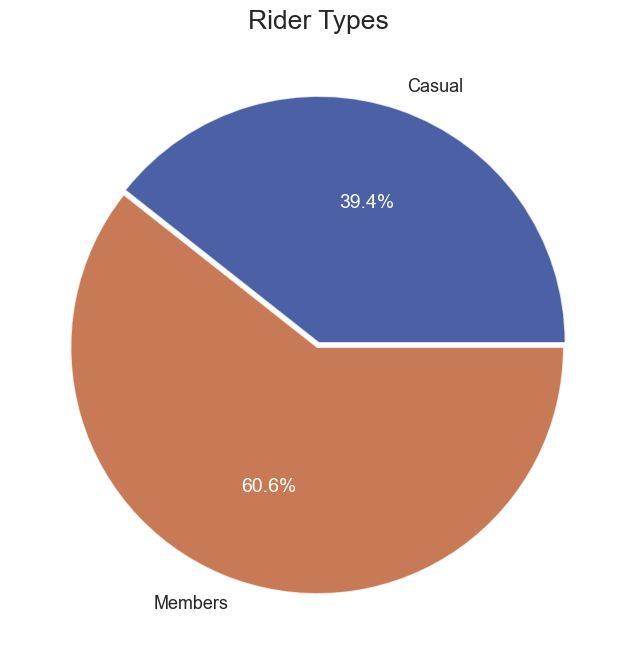

In [11]:
# TODO: ANIMATE BY MONTH

typeProportion = (
    df["member_casual"].value_counts(normalize=True).mul(100).sort_index().to_list()
)

plt.figure(figsize=(40, 8))
plt.title(label="Rider Types", fontdict={"fontsize": 19})
_, _, autotexts = plt.pie(
    typeProportion,
    labels=["Casual", "Members"],
    colors=[DP[0], DP[1]],
    textprops={"fontsize": 13},
    autopct="%.1f%%",
    wedgeprops={"alpha": 0.7},
    explode=[0.01, 0.01],
)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(14)